In [115]:
# import pandas
import numpy as np
import pandas as pd
# import matplotlin
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

def create_boxplot(df, i, ts, cs):

    data5500itters = df[df.Itters == i] # Set the number of itteration
    data5500itters = data5500itters[data5500itters.Sampling_Method != 'random2']
    data5500i30000p = data5500itters[data5500itters.Total_Size == ts]# Keep only those with the total size 
    data5500i30000p = data5500itters[data5500itters.Current_Size == cs]# Keep only those with the current = total size 
    
    return sns.boxplot(y='Area', x='Sampling_Method', data=data5500i30000p, width=0.5,palette="colorblind").set_title("Comparison of Area of Madelbrot Set with Antithetic Variables\n s = {} and i = {} ".format(cs,i))

def create_distplot(df, ty, i, ts, cs):
    data5500itters = df[df.Itters == i] # Set the number of itteration
    data5500itters = data5500itters[data5500itters.Sampling_Method == ty]
    data5500i30000p = data5500itters[data5500itters.Total_Size == ts]# Keep only those with the total size 
    data5500i30000p = data5500itters[data5500itters.Current_Size == cs]# Keep only those with the current = total size 
    print(data5500i30000p.shape[0])
    return sns.distplot(data5500i30000p.Area)

In [103]:
area_cube = 9
area_random = 8.3765
anti_rand = 7.753

itters = 5500
Tot_sz = 10000
Cur_sz = 10000

path = "data/resultsnotantithetic.csv"
nms = ["Sampling_Method","Itters", "Current_Size", "Total_Size", "Num_In"]
pandasdata = pd.read_csv(path, delimiter=',', names=nms)
pandasdata = pandasdata[pandasdata.Current_Size != 0]

areas = (pandasdata.Num_In / pandasdata.Total_Size)*area_random

#print(areas)

pandasdataArea = pandasdata


pandasdataArea['Area'] = areas.where(pandasdataArea.Sampling_Method == 'random', other = areas*(area_cube/area_random))

path2 = "data/resultsantithetic.csv"
antipnds = pd.read_csv(path2, delimiter=',', names=nms)
antipnds = antipnds[antipnds.Current_Size != 0]
antipnds = antipnds.replace("random3", "random")
antipnds = antipnds.replace("random4", "random")
antipnds = antipnds.replace("random1", "random")
antipnds = antipnds.replace("hypercube1", "hypercube")
antipnds = antipnds.replace("hypercube2", "hypercube")
antipnds = antipnds.replace("orthoginal1", "orthogonal")
antipnds = antipnds.replace("orthoginal2", "orthogonal")


areas = (antipnds.Num_In / antipnds.Total_Size)*anti_rand

#print(areas)

antipndsArea = antipnds


antipndsArea['Area'] = areas.where(antipndsArea.Sampling_Method == 'random', other = areas*(area_cube/anti_rand))

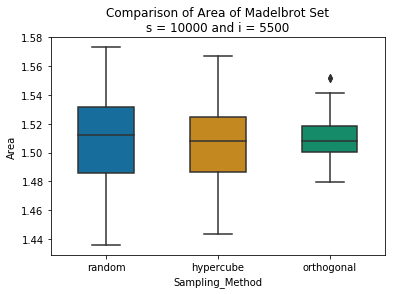

In [104]:

#Which ones should we examine?  The best I would think?  and the worse?

boxpltrndl = create_boxplot(pandasdataArea, itters, Tot_sz, Cur_sz)

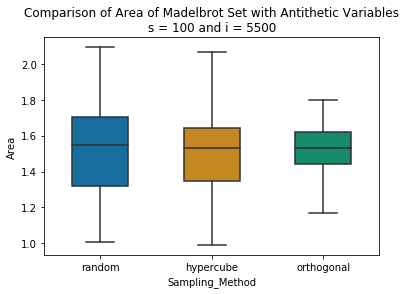

In [116]:
boxpltantil = create_boxplot(antipndsArea, itters, Tot_sz, Cur_sz)

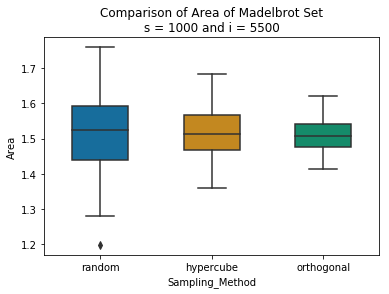

In [106]:
itters = 5500
Tot_sz = 1000
Cur_sz = 1000

boxpltrnds = create_boxplot(pandasdataArea, itters, Tot_sz, Cur_sz)

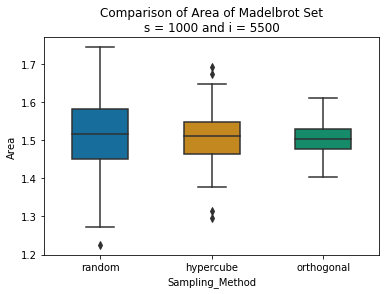

In [107]:
itters = 5500
Tot_sz = 1000
Cur_sz = 1000

boxpltantis = create_boxplot(antipndsArea, itters, Tot_sz, Cur_sz)

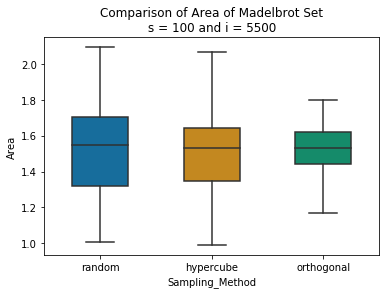

In [108]:
itters = 5500
Tot_sz = 100
Cur_sz = 100

boxpltantis = create_boxplot(antipndsArea, itters, Tot_sz, Cur_sz)

100


/home/jordan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of the Area in Antithetic Random Sampling \n using 5500 Itterations, 30000 Samples')

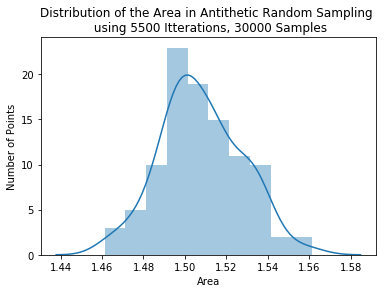

In [109]:
antipndsArea

distplot = create_distplot(antipndsArea, "random", 5500, 30000, 30000)
plt.ylabel("Number of Points")
plt.title('Distribution of the Area in Antithetic Random Sampling \n using 5500 Itterations, 30000 Samples')

100


/home/jordan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of the Area in Antithetic Latin Hypercube Sampling \n using 5500 Itterations, 10000 Samples')

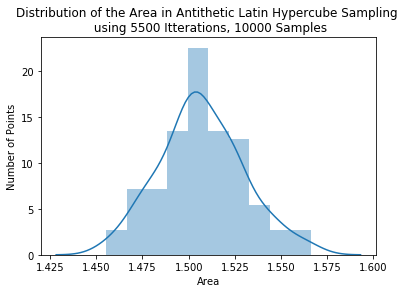

In [110]:
distplot = create_distplot(antipndsArea, "hypercube", 5500, 10000, 10000)
plt.ylabel("Number of Points")
plt.title('Distribution of the Area in Antithetic Latin Hypercube Sampling \n using 5500 Itterations, 10000 Samples')

100


/home/jordan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of the Area in Antithetic Orthogonal Sampling \n using 5500 Itterations, 10000 Samples')

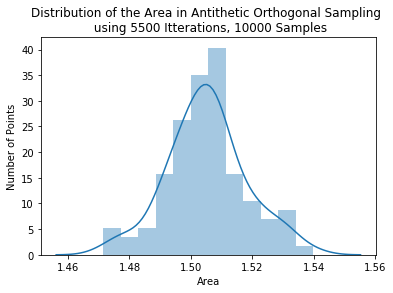

In [111]:
distplot = create_distplot(antipndsArea, "orthogonal", 5500, 10000, 10000)
plt.ylabel("Number of Points")
plt.title('Distribution of the Area in Antithetic Orthogonal Sampling \n using 5500 Itterations, 10000 Samples')

100


/home/jordan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of the Area in Random Sampling \n using 5500 Itterations, 30000 Samples')

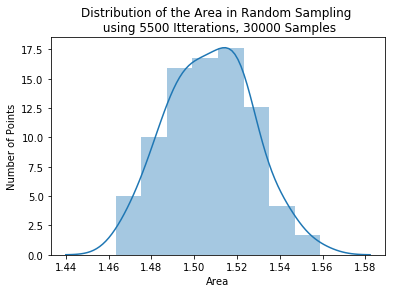

In [112]:
distplot = create_distplot(pandasdataArea, "random", 5500, 30000, 30000)
plt.ylabel("Number of Points")
plt.title('Distribution of the Area in Random Sampling \n using 5500 Itterations, 30000 Samples')

100


/home/jordan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of the Area in Latin Hypercube Sampling \n using 5500 Itterations, 10000 Samples')

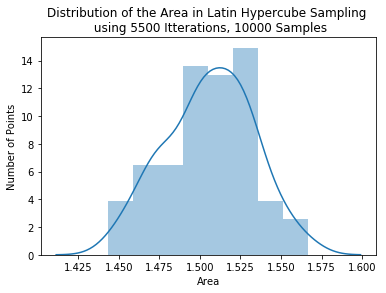

In [113]:
distplot = create_distplot(pandasdataArea, "hypercube", 5500, 10000, 10000)
plt.ylabel("Number of Points")
plt.title('Distribution of the Area in Latin Hypercube Sampling \n using 5500 Itterations, 10000 Samples')

100


/home/jordan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of the Area in Orthogonal Sampling \n using 5500 Itterations, 10000 Samples')

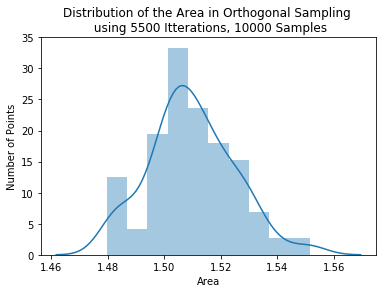

In [114]:
distplot = create_distplot(pandasdataArea, "orthogonal", 5500, 10000, 10000)
plt.ylabel("Number of Points")
plt.title('Distribution of the Area in Orthogonal Sampling \n using 5500 Itterations, 10000 Samples')